# Examen de traitement du signal
Dans cet examen, on va implémenter les opérations de sous-échantillonnage et sur-échantillonnage du Chapitre 2 du polycopié. On examinera les effets de ces opérations sur le spectre des signaux considérés, avec et sans pré/post-filtrage. Essayez de détailler au maximum vos réponses, et de proprement commenter le code, d'inclure des légendes pour les figures.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

### Question 1
Construire un signal constitué d'une somme de sinuosïdes et d'un bruit blanc gaussien

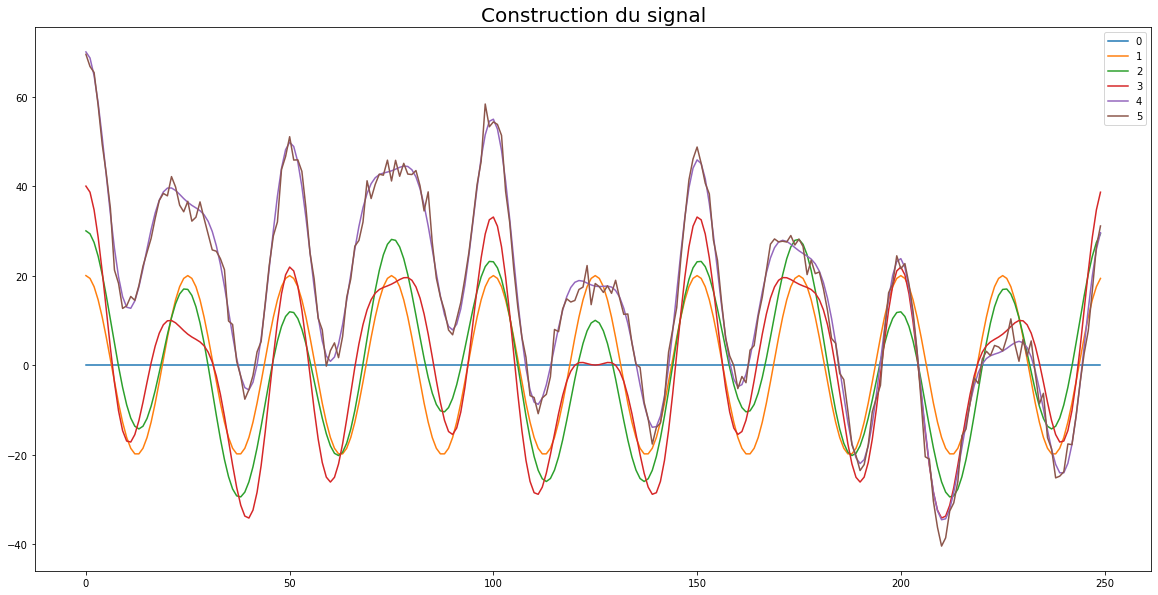

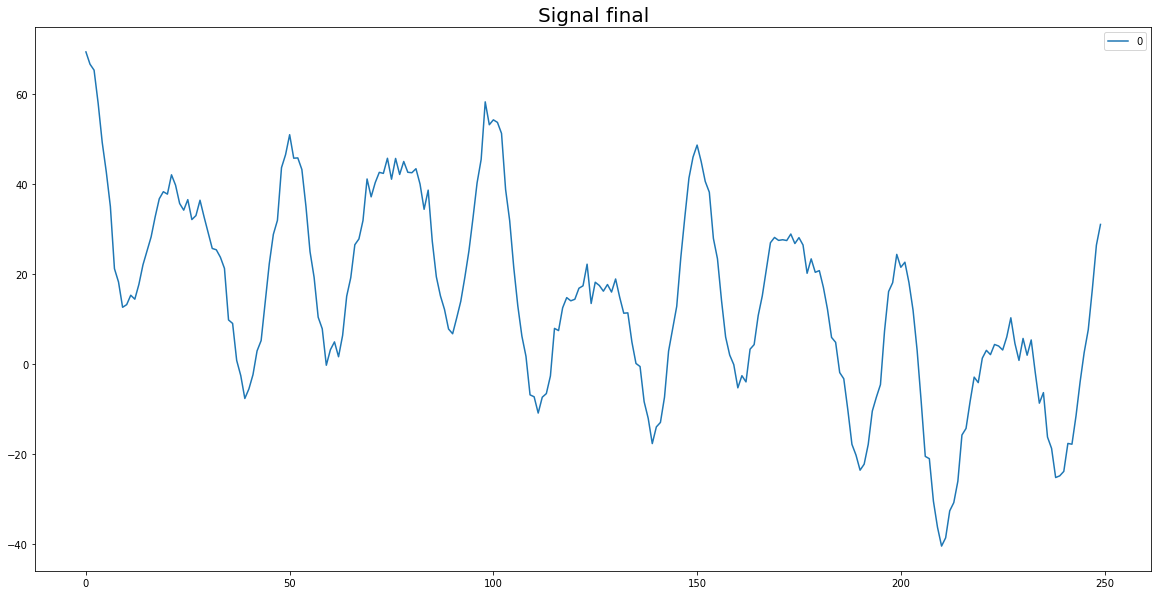

In [159]:
from random import random
rd = random
from math import sqrt, log, cos

N = 250 #Nombre de cases dans le tableau

tab = [np.zeros(N, dtype=float)] #vecteur représentant un signal
w = 2*np.pi/N #Pulsation du signal, choisie telle que le tableau couvre une période

def add_cos(vect, amp, pulse, phase = 0):
    """Ajoute une composante en cosinus à un vecteur, sans le modifier."""
    n = vect.shape[0]
    new_vect = np.arange(n)
    new_vect = amp * np.cos(pulse * new_vect + phase) + vect
    return new_vect

def add_gaussian_noise(vect, amp):
    """Ajoute un bruit gaussien à un signal d'amplitude amp, sans le modifier."""
    n = vect.shape[0]
    new_vect = np.random.randn(n)
    new_vect = vect + amp * new_vect
    return new_vect

def plt_signal(vects, names = None, figname = None):
    """Fonction qui affiche un ou plusieurs signal ou signaux avec légende éventuelle."""
    plt.figure(figsize=(20,10))
    if type(vects) != list:
        vects = [vects]
    if names == None:
        names = np.arange(len(vects))
    for i, vect in enumerate(vects):
        n = vect.shape[0]
        abscisses = np.arange(n)
        plt.plot(abscisses, vect, label = names[i])
    plt.legend()
    if figname != None:
        plt.title(figname, fontsize = 20)
    plt.show()
    
tab.append(add_cos(tab[-1], 20, 10*w))
tab.append(add_cos(tab[-1], 10, 3*w))
tab.append(add_cos(tab[-1], 10, w*15))
tab.append(add_cos(tab[-1], 30, w*0.3))
tab.append(add_gaussian_noise(tab[-1], 2))

Signal = tab[-1]

plt_signal(tab, figname = "Construction du signal")
plt_signal(Signal, figname = "Signal final")

### Question 2
Sur-échantillonner le signal d'un facteur 2 par insertion de zéros, sans post-filtrage. Comparer les spectres des deux signaux, en affichant les fréquences discrètes en rad/éch. 

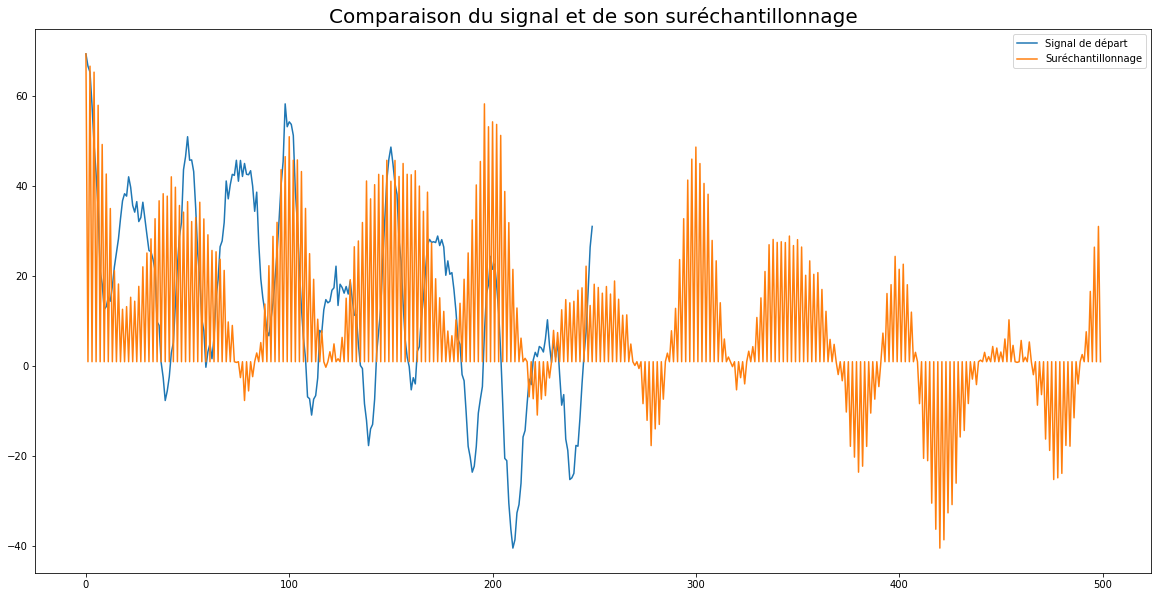

In [160]:
def surechantillonner(vect, facteur):
    """Suréchantillone un signal par un facteur passé par l'appel, avec insertion de 0."""
    n = vect.shape[0]
    ech = np.ones((n * facteur), dtype=float)
    for i in range(n):
        ech[i * facteur] = vect[i]
    return ech

Sursignal = surechantillonner(Signal, 2)
plt_signal([Signal, Sursignal], ["Signal de départ", "Suréchantillonnage"], 'Comparaison du signal et de son suréchantillonnage')

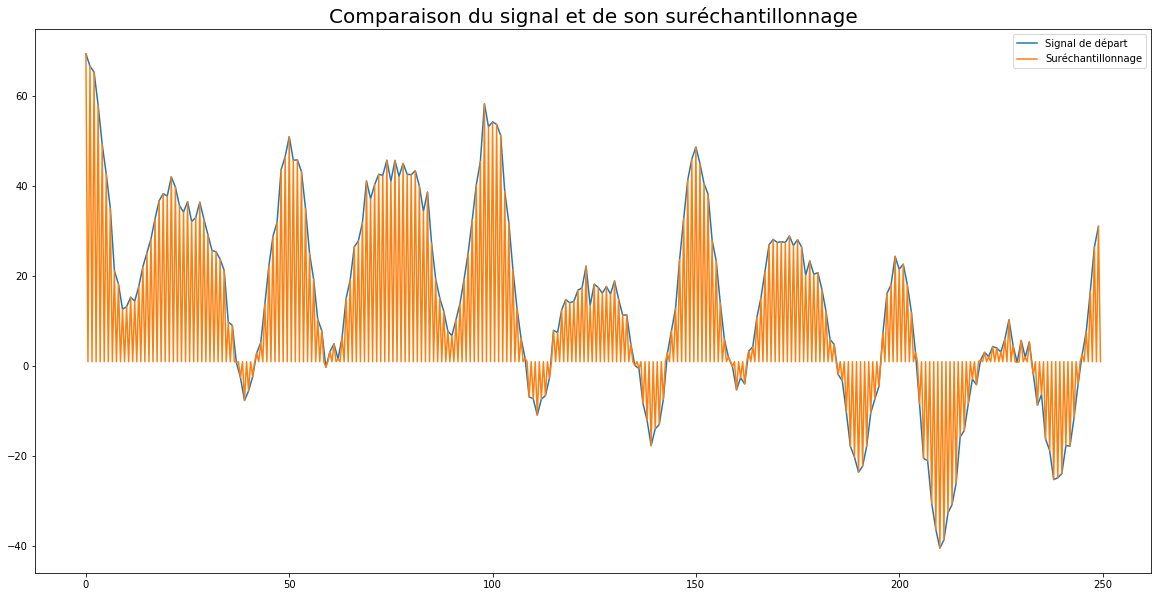

In [161]:
#Ici, les signaux ne se superposent pas car la fonction à prévu des vecteurs de même longueur. On peut en coder une autre.

def plt_signal_superposed(vects, names = None, figname = None):
    """Fonction simple qui affiche un (ou plusieurs) signal (ou signaux) avec légende.
    Si ils sont plusieurs, les signaux sont dilatés pour qu'ils finissent au même point que le premier."""
    plt.figure(figsize=(20,10))
    if type(vects) != list:
        vects = [vects]
    if names == None:
        names = np.arange(len(vects))
    N = vects[0].shape[0]
    for i, vect in enumerate(vects):
        n = vect.shape[0]
        abscisses = N*np.arange(n)/n 
        plt.plot(abscisses, vect, label = names[i])
    plt.legend()
    if figname != None:
        plt.title(figname, fontsize = 20)
    plt.show()
    
plt_signal_superposed([Signal, Sursignal], ["Signal de départ", "Suréchantillonnage"], 'Comparaison du signal et de son suréchantillonnage')

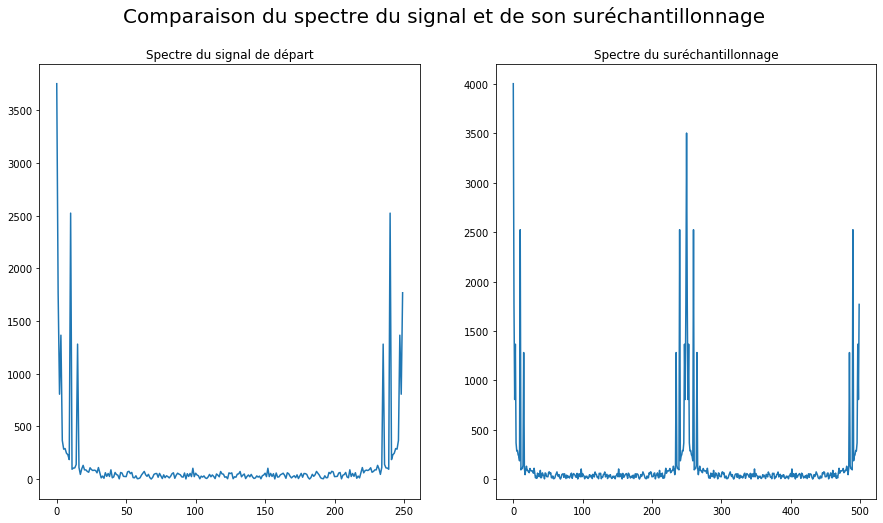

In [247]:
def get_spectre(vect):
    sp = np.fft.fft(vect)
    sp = np.abs(sp)
    return sp

Spectre_Signal = get_spectre(Signal)
Spectre_Sursignal = get_spectre(Sursignal)

def plt_spectre(spectres, w, names = None, figname = None):
    """Fonction simple qui affiche un (ou plusieurs) spectre(s) avec légende."""
    if type(spectres) != list:
        spectres = [spectres]
    n = len(spectres)
    fig, axs = plt.subplots(1, n, figsize = (w,8))
    if names == None:
        names = np.arange(len(spectres))
    for i, sp in enumerate(spectres):
        n = sp.shape[0]
        abscisses = np.arange(n)
        axs[i].plot(abscisses, sp)
        axs[i].set_title(names[i])
    if figname != None:
        fig.suptitle(figname, fontsize = 20)

plt_spectre([Spectre_Signal, Spectre_Sursignal], 15, ["Spectre du signal de départ", "Spectre du suréchantillonnage"], 'Comparaison du spectre du signal et de son suréchantillonnage')

On remarque bien que le spectre du suréchantillonage est un dédoublement du spectre normal autour de la fréquence extême, ce qui correspond bien à un suréchantillonnage de facteur 2.

### Question 3
La transformée bilinéaire permet de convertir un filtre continu en filtre discret par une simple substitution de la variable complexe $s$ par la quantité $\frac{2}{\Delta t}\frac{1-z^{-1}}{1+z^{-1}}$. Effectuer cette substitution pour un filtre de Butterworth passe-bas d'ordre 1, de pulsation de coupure $\omega_c$ et un pas de temps $\Delta t = 1$. En déduire une équation aux différences permettant de calculer la sortie d'un filtre passe-bas discret en fonction de l'entrée. Noter que la pulsation de coupure discrète $\Omega_c$ est reliée à $\omega_c$ par la formule $$\omega_c = \frac{2}{\Delta t}\tan\left(\frac{\Omega_c}{2}\right)$$

Réponse : 

### Question 4
Construire une fonction implémentant un filtre passe-bas discret à la pulsation de coupure $\Omega_c = \frac{\pi}{2}$ rad/ech à l'aide de la question précédente. 

Si on prend $\Omega_{c} = \frac{\pi}{2}$, on a $ \tan(\frac{\Omega_{c}}{2}) = 1$.

Donc l'équation aux différences devient:

$$ 2 y[n] = x[n] + x[n-1]$$

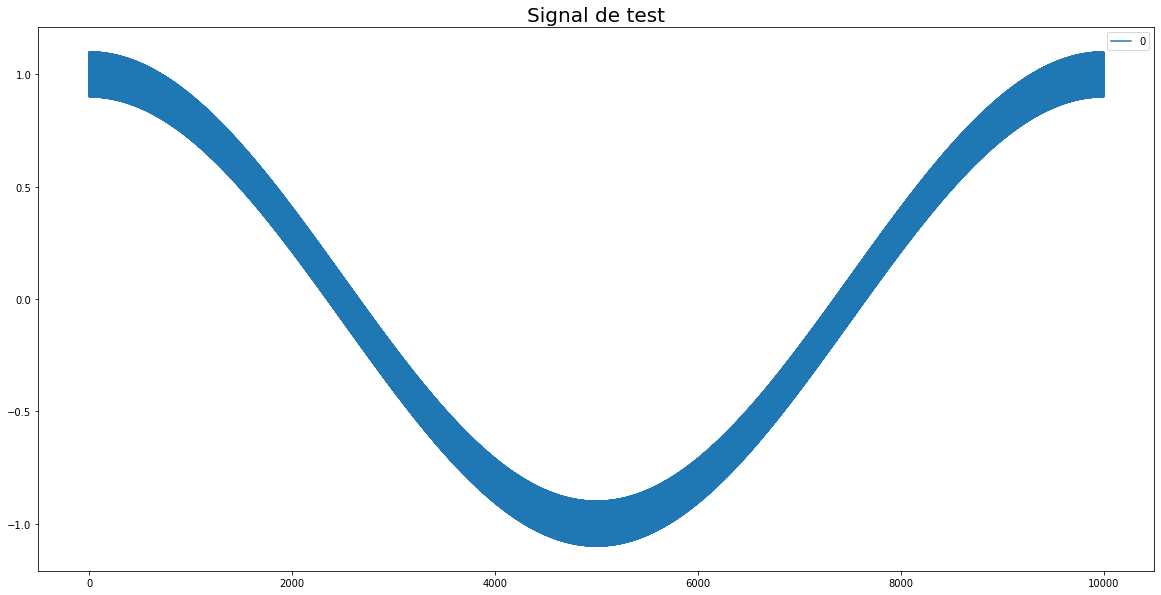

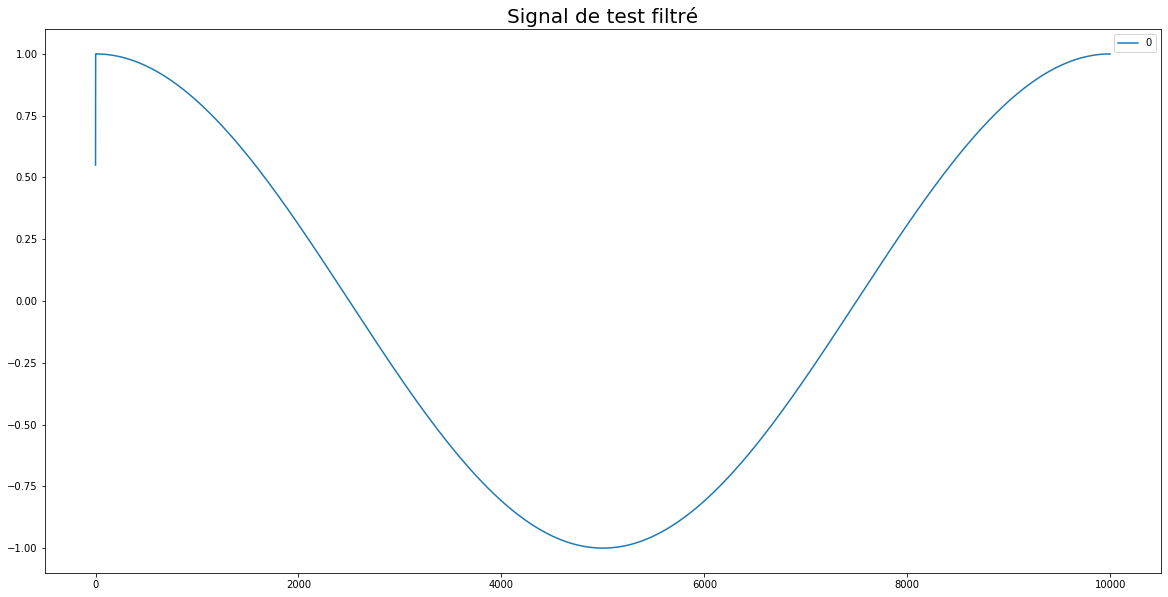

In [236]:
def bworth_filter(x):
    """Applique à un signal discétisé un filtre de Butterworth passe-bas d'ordre 1 où la pulsation de coupure discrète est pi/2."""
    n = x.shape[0]
    y = np.zeros(n)
    y[1:] = [x[i] + x[i-1] for i in range(1, n)]
    y[0] = x[0]
    y /= 2
    return y

#Testons ce filtre

testN = 10000
testw = 2*np.pi / testN

test = np.zeros(testN, dtype = float)
test = add_cos(test, 1, 1*testw) #Composante de basse fréquence
test = add_cos(test, 0.1, 5000*testw) #Composante de haute fréquence
ftest = bworth_filter(test)

plt_signal([test], figname = "Signal de test")
plt_signal([ftest], figname = "Signal de test filtré")

Ce filtre est bien un passe-bas.

### Question 5
Appliquer ce filtre au signal sur-échantillonné. Comparer les spectres des trois signaux et commenter. 

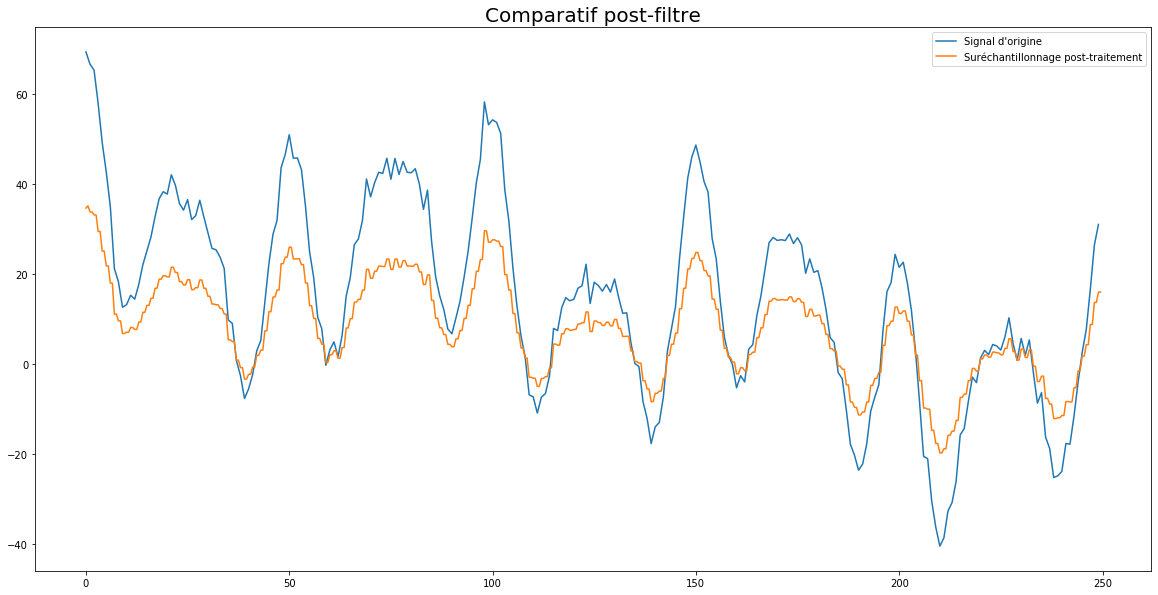

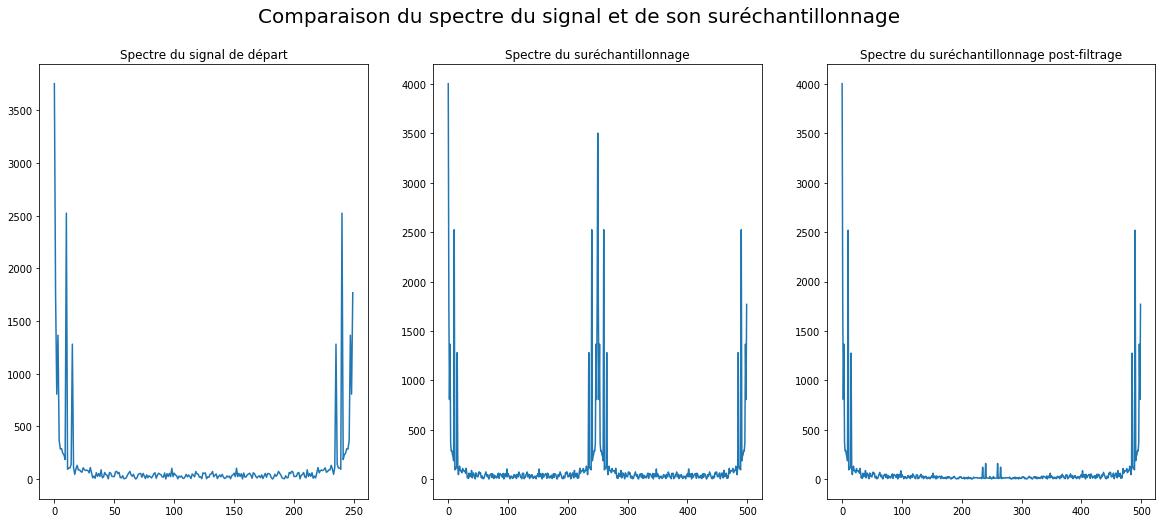

In [250]:
FSursignal = bworth_filter(Sursignal) #FilteredSursignal -> FSursignal

plt_signal_superposed([Signal, FSursignal], ["Signal d'origine", "Suréchantillonnage post-traitement"], "Comparatif post-filtre")

Spectre_FSursignal = get_spectre(FSursignal)
plt_spectre([Spectre_Signal, Spectre_Sursignal, Spectre_FSursignal], 20, ["Spectre du signal de départ", "Spectre du suréchantillonnage", "Spectre du suréchantillonnage post-filtrage"], 'Comparaison du spectre du signal et de son suréchantillonnage')

On remarque que le filtre a deux effets sur le signal suréchantillonné post-traitement:
- les effets du suréchantillonnage disparaissent
- une perte d'amplitude au niveau de la plus haute des fréquences présente à l'origine

Le second point s'explique immédiatement, puisque l'on utilise un passe-bas.
Quant au premier, on peut voir que le filtre est parfaitement adapté au suréchantillonnage par un facteur 2: si 

$$X = (x_{1}, ... , x_{n})$$

est un signal, alors en suréchantillonnant par un facteur $2$ le signal $X$, on obtient un signal

$$Y = (x_{1}, 0, x_{2}, 0, ... , x_{n}, 0)$$

En appliquant le filtre décrit plus haut, comme l'équation aux différences est: 

$$ 2 y[n] = x[n] + x[n-1]$$ 

On obtient le vecteur $Z$ suivant:

$$ Z = (\frac{x_{1}}{2}, x_{1}, x_{2}, x_{2}, ... , x_{n}, x_{n})$$

On récupère donc le vecteur $X$ en sous-échantillonnant le vecteur $Z$ d'un facteur 2.

### Question 6
Comparer maintenant
 - le spectre du signal d'origine,
 - le spectre du signal sous-échantillonné d'un facteur 2 sans pré-filtrage,
 - le spectre du signal sous-échantillonné d'un facteur 2 avec pré-filtrage à la fréquence de coupure $\frac{\pi}{2}$ rad/ech. 